**Prediction of coronory risk in 10 years time
The objective of this project is to build a model which predicts if a patient is in risk of a coronary disease in the next 
ten years base on prevailing data available.
The variables in the data set into three categories.**

In [1]:
import sklearn
x=dir(sklearn)
print(x)

['__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_distributor_init', 'base', 'clone', 'config_context', 'exceptions', 'get_config', 'logger', 'logging', 'os', 'set_config', 'setup_module', 'show_versions', 'sys', 'utils']


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import auc,confusion_matrix,r2_score,roc_auc_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
heart_data=pd.read_csv("C:\\Users\\Jenisa Correia\\Downloads\\heart_disease.csv",header=0)
heart_data.head(5)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,4.0,non-smoker,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,female,46,2.0,non-smoker,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,male,48,1.0,smoker,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,female,61,3.0,smoker,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,female,46,3.0,smoker,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
heart_data.tail()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,male,50,1.0,smoker,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,male,51,3.0,smoker,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,female,48,2.0,smoker,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,female,44,1.0,smoker,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,female,52,2.0,non-smoker,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [6]:
heart_data.columns

Index(['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**1.Denographic info about patient<br>
Sex:MAle,Female<br>
age:age of a patient<br>
education:doesnt matter<br>
2.Tobbaco usage of a patient<br>
currentsmoker:smokes or not<br>
cigPerDay:ciggarates per day if smoker<br>
3.Health information of patient<br>
BPMeds - If a patient is taking BP<br>
prevalentStroke - Status of stroke occurance<br>
prevalentHyp - Status of prevailing hyper tension<br>
diabetes - Status of diabetes<br>
totChol - Cholestrol level<br>
sysBP - Blood pressure level<br>
diaBP - Diastolic blood pressure<br>
sysBP - Systolic blood pressure<br>
BMI - Body mass Index<br>
heartRate - Heart rate reading<br>
gluscose - Glucose level<br><br>
TenYearCHD - status if will suffer a risk of coronary disease in next ten years**<br>


In [7]:
heart_data.isnull().sum()

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
print(heart_data['sex'].unique())
print(heart_data['currentSmoker'].unique())

['male' 'female']
['non-smoker' 'smoker']


In [9]:
print(heart_data['sex'].value_counts())
print(heart_data['currentSmoker'].value_counts())

female    2419
male      1819
Name: sex, dtype: int64
non-smoker    2144
smoker        2094
Name: currentSmoker, dtype: int64


In [10]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
heart_data['sex']= label_encoder.fit_transform(heart_data['sex'])
heart_data['currentSmoker']= label_encoder.fit_transform(heart_data['currentSmoker'])

In [11]:
heart_data.head(2)

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0


heart_data_BPMed = heart_data.groupby(['prevalentStroke','prevalentHyp'])
heart_data_BPMed['BPMeds'].sum()

heart_data_smoker = heart_data.groupby(['prevalentHyp'])
heart_data_smoker['BPMeds'].describe()

**prevalentHyp tension  patient  is on Bpmeds**

In [12]:
heart_data.corr()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
sex,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


<AxesSubplot:>

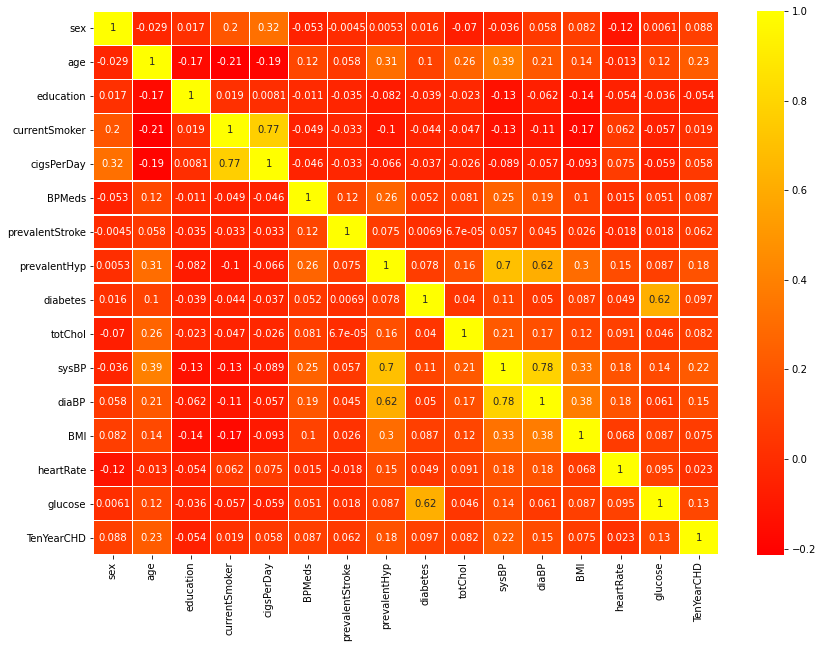

In [13]:
colormap = plt.cm.autumn
plt.figure(figsize=(14,10))
sns.heatmap(heart_data.corr(), cmap=colormap, annot=True, linewidths=0.2) # annot=True to display correlation

In [14]:
heart_data.describe()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


heart_data['education'].mode()

heart_data.fillna(1,inplace=True)

heart_data.fillna(value=heart_data['education'].mode(), inplace=True)

heart_data_smoker = heart_data.groupby(['currentSmoker'])
heart_data_smoker['cigsPerDay'].describe()#currentsmoker and cigsperday are correlated

for i,data in heart_data.iterrows():
    if data['currentSmoker']==1:
        heart_data.fillna(value=heart_data['cigsPerDay'].mean(),inplace=True)
    else:
        data['currentSmoker']==0:
            

heart_data['cigsPerDay'].isnull().sum()

heart_data.head(80)

for i,data in heart_data.iterrows():
    if data['prevalentHyp']==1:
        heart_data.fillna(value=heart_data['BPMeds'].mean(),inplace=True)
    else:
        data['prevalentHyp']==0

heart_data.tail(456)

<ipython-input-15-020bbccbf0e5>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart_data.hist(ax = ax)


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

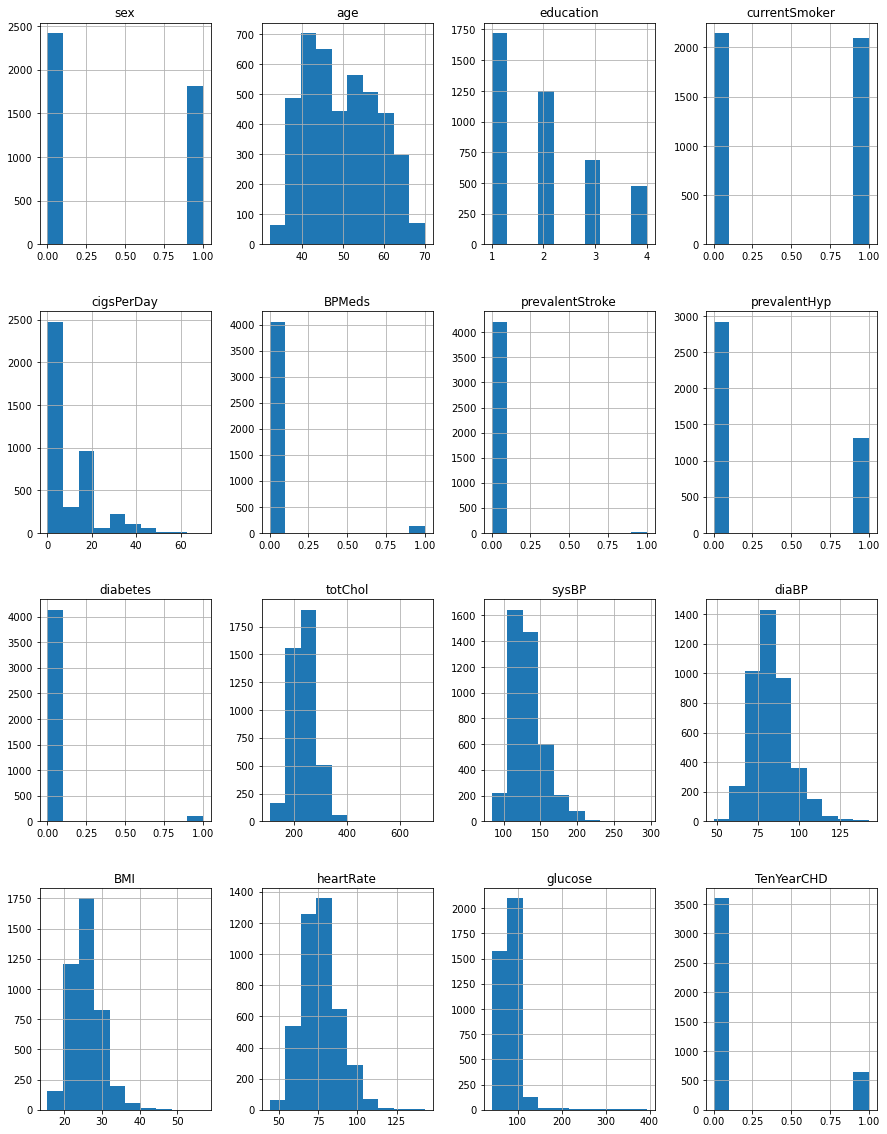

In [15]:
# checking distributions using histograms
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
heart_data.hist(ax = ax)

In [16]:
# Dropping columns education and glucose
heart_data = heart_data.drop(['education'], axis=1)

In [17]:
# Dropping all rows with missing data
heart_data = heart_data.dropna()
heart_data.isna().sum()


sex                0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [18]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = heart_data.iloc[:,0:14]  #independent columns
y = heart_data.iloc[:,-1]    #target column 

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

           Specs       Score
9          sysBP  667.474699
13       glucose  402.071787
1            age  297.287121
8        totChol  251.628483
3     cigsPerDay  185.952614
10         diaBP  143.272443
6   prevalentHyp   82.461330
7       diabetes   31.671664
4         BPMeds   26.080485
0            sex   19.191630
11           BMI   17.051372


In [19]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

,Specs,Score
9,sysBP,667.474699
13,glucose,402.071787
1,age,297.287121
8,totChol,251.628483
3,cigsPerDay,185.952614
10,diaBP,143.272443
6,prevalentHyp,82.461330
7,diabetes,31.671664
4,BPMeds,26.080485
0,sex,19.191630


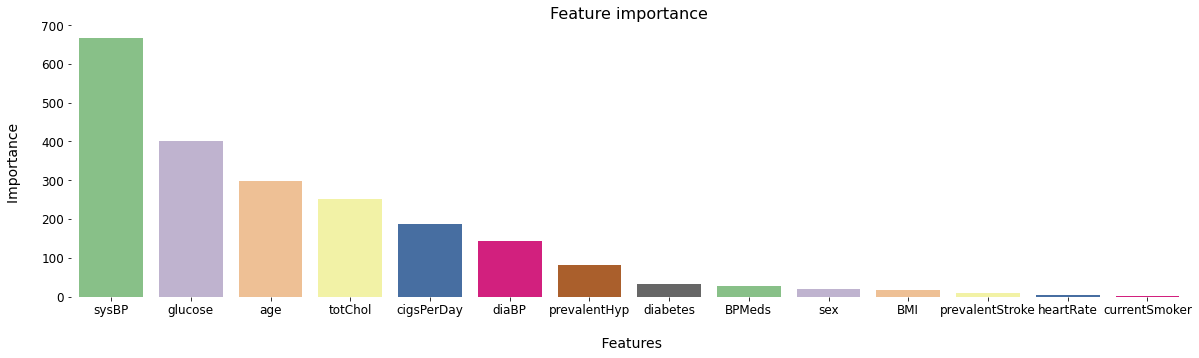

In [20]:
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "Accent")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [21]:
#best=SelectKBest(chi2,k=10).fit(X_train,y_train) #use k=6
#featureScores.columns[best.get_support()]
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list


['sysBP',
 'glucose',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'sex']

In [22]:
heart_data['TenYearCHD'].value_counts()/4238

0    0.749646
1    0.134969
Name: TenYearCHD, dtype: float64

In [23]:
count_col = ['sex','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
heart_data_CHD = heart_data.groupby(['TenYearCHD'])
heart_data_CHD[count_col].sum()

,sex,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes
TenYearCHD,,,,,,
0,1350,1537,77.0,13,879,66
1,319,294,37.0,8,290,36


In [24]:
# Create new dataframe with selected features

df = heart_data[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','sex','TenYearCHD']]
df.head()

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
0,106.0,77.0,39,195.0,0.0,70.0,0,0,0.0,1,0
1,121.0,76.0,46,250.0,0.0,81.0,0,0,0.0,0,0
2,127.5,70.0,48,245.0,20.0,80.0,0,0,0.0,1,0
3,150.0,103.0,61,225.0,30.0,95.0,1,0,0.0,0,1
4,130.0,85.0,46,285.0,23.0,84.0,0,0,0.0,0,0


<AxesSubplot:>

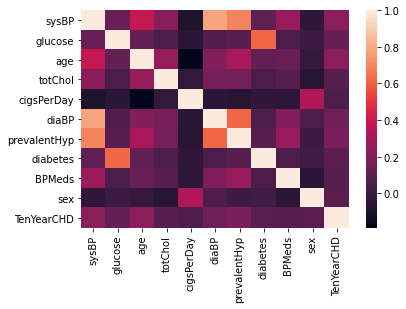

In [25]:
# Checking correlation again
df_corr = df.corr()
sns.heatmap(df_corr)

<AxesSubplot:xlabel='TenYearCHD'>

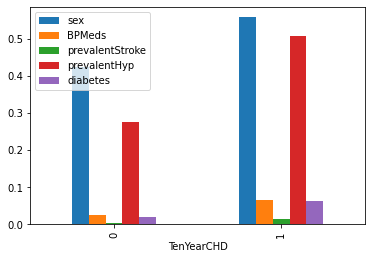

In [26]:
count_col = ['sex','BPMeds','prevalentStroke','prevalentHyp','diabetes']

heart_data_CHD = heart_data.groupby(['TenYearCHD'])
heart_data_CHD[count_col].mean().plot(kind='bar')

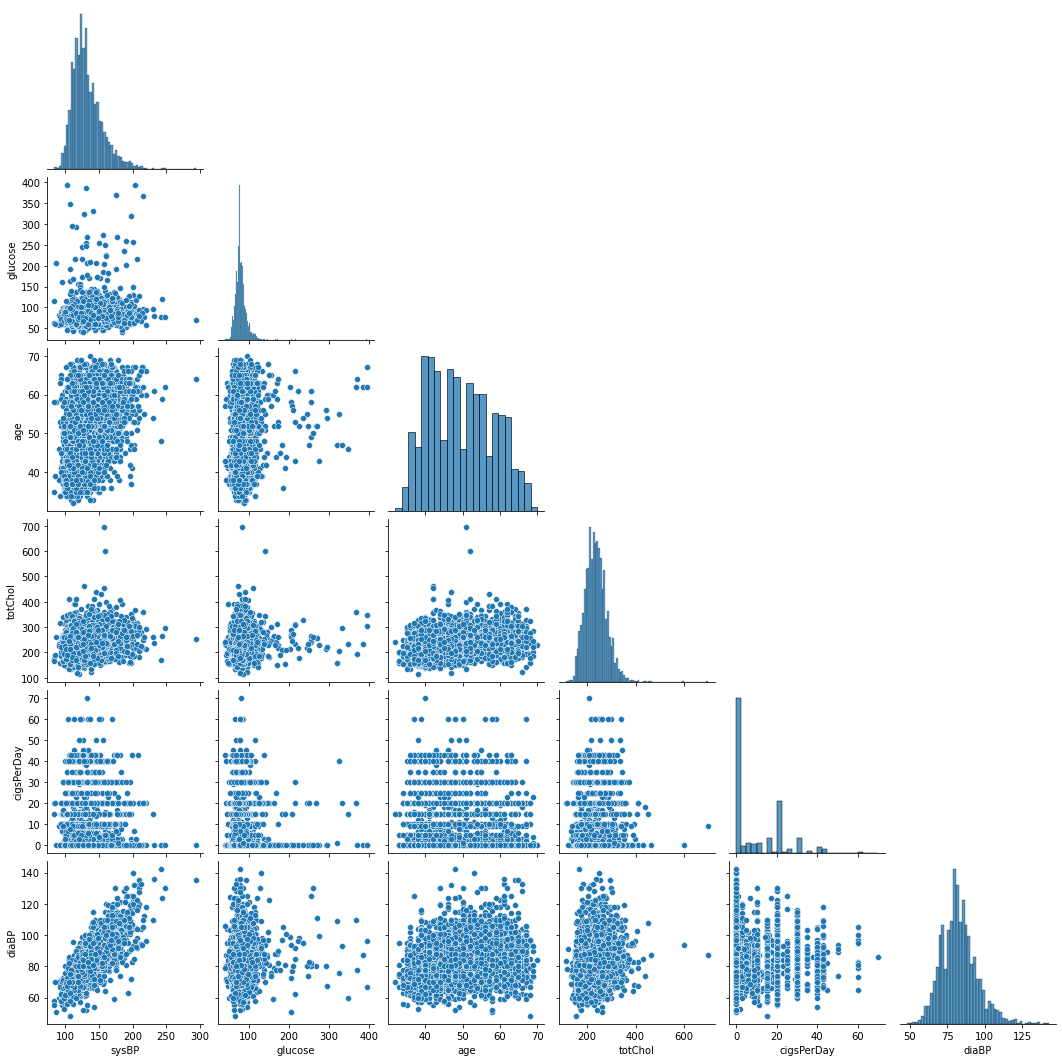

In [27]:
cont_col = ['sysBP','glucose','age','totChol','cigsPerDay','diaBP']
sns.pairplot(df[cont_col],corner=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sysBP'>

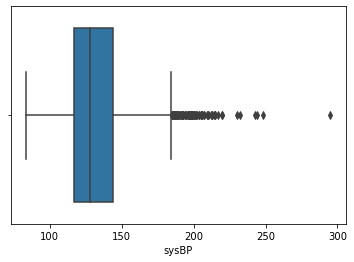

In [28]:
sns.boxplot(df['sysBP'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='glucose'>

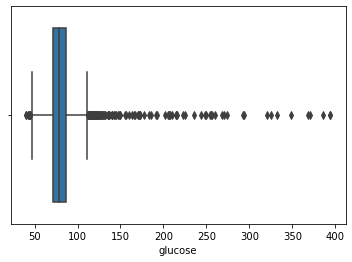

In [29]:
sns.boxplot(df['glucose'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cigsPerDay'>

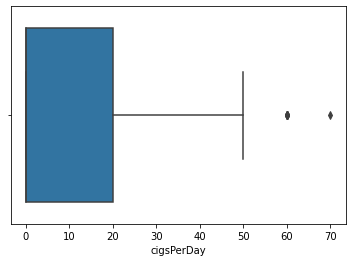

In [30]:
sns.boxplot(df['cigsPerDay'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totChol'>

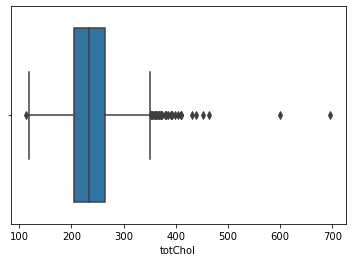

In [31]:
sns.boxplot(df['totChol'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diaBP'>

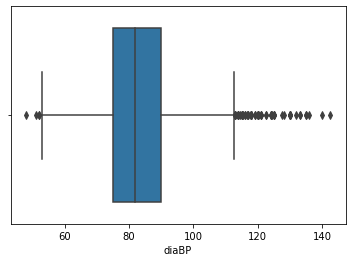

In [32]:
sns.boxplot(df['diaBP'])

In [33]:
Q1 = df.cigsPerDay.quantile(0.25)
Q3 = df.cigsPerDay.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df2 = df[(df['cigsPerDay']<lower) | (df['cigsPerDay']>upper)]
print("Number of Outliers Detected in cigsPerDay:",df2.shape[0])


Number of Outliers Detected in cigsPerDay: 11


In [34]:
for i,data in df.iterrows():
    if data['cigsPerDay']<lower:
        df.at[i,'cigsPerDay']=lower # random no in proper range
    elif data['cigsPerDay']>upper:
        df.at[i,'cigsPerDay']=upper # random no in proper range

In [35]:
Q1 = df.totChol.quantile(0.25)
Q3 = df.totChol.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df2 = df[(df['totChol']<lower) | (df['totChol']>upper)]
print("Number of Outliers Detected in totChol:",df2.shape[0])


Number of Outliers Detected in totChol: 42


In [36]:
for i,data in df.iterrows():
    if data['totChol']<lower:
        df.at[i,'totChol']=lower # random no in proper range
    elif data['totChol']>upper:
        df.at[i,'totChol']=upper # random no in proper range

In [37]:
Q1 = df.sysBP.quantile(0.25)
Q3 = df.sysBP.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df2 = df[(df['sysBP']<lower) | (df['sysBP']>upper)]
print("Number of Outliers Detected in sysBP:",df2.shape[0])

Number of Outliers Detected in sysBP: 110


In [38]:
for i,data in df.iterrows():
    if data['sysBP']<lower:
        df.at[i,'sysBP']=lower # random no in proper range
    elif data['sysBP']>upper:
        df.at[i,'sysBP']=upper # random no in proper range

In [39]:
Q1 = df.diaBP.quantile(0.25)
Q3 = df.diaBP.quantile(0.75)
IQR = Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df1 = df[(df['diaBP']<lower) | (df['diaBP']>upper)]
print("Number of Outliers detected in diaBP:",df2.shape[0])

Number of Outliers detected in diaBP: 110


In [40]:
for i,data in df.iterrows():
    if data['diaBP']<lower:
        df.at[i,'diaBP']=lower # random no in proper range
    elif data['diaBP']>upper:
        df.at[i,'diaBP']=upper # random no in proper range


In [41]:
Q1 = df.glucose.quantile(0.25)
Q3 = df.glucose.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df2 = df[(df['glucose']<lower) | (df['glucose']>upper)]
print("Number of Outliers detected in glucose:",df2.shape[0])

Number of Outliers detected in glucose: 181


In [42]:
for i,data in df.iterrows():
    if data['glucose']<lower:
        df.at[i,'glucose']=lower # random no in proper range
    elif data['glucose']>upper:
        df.at[i,'glucose']=upper # random no in proper range

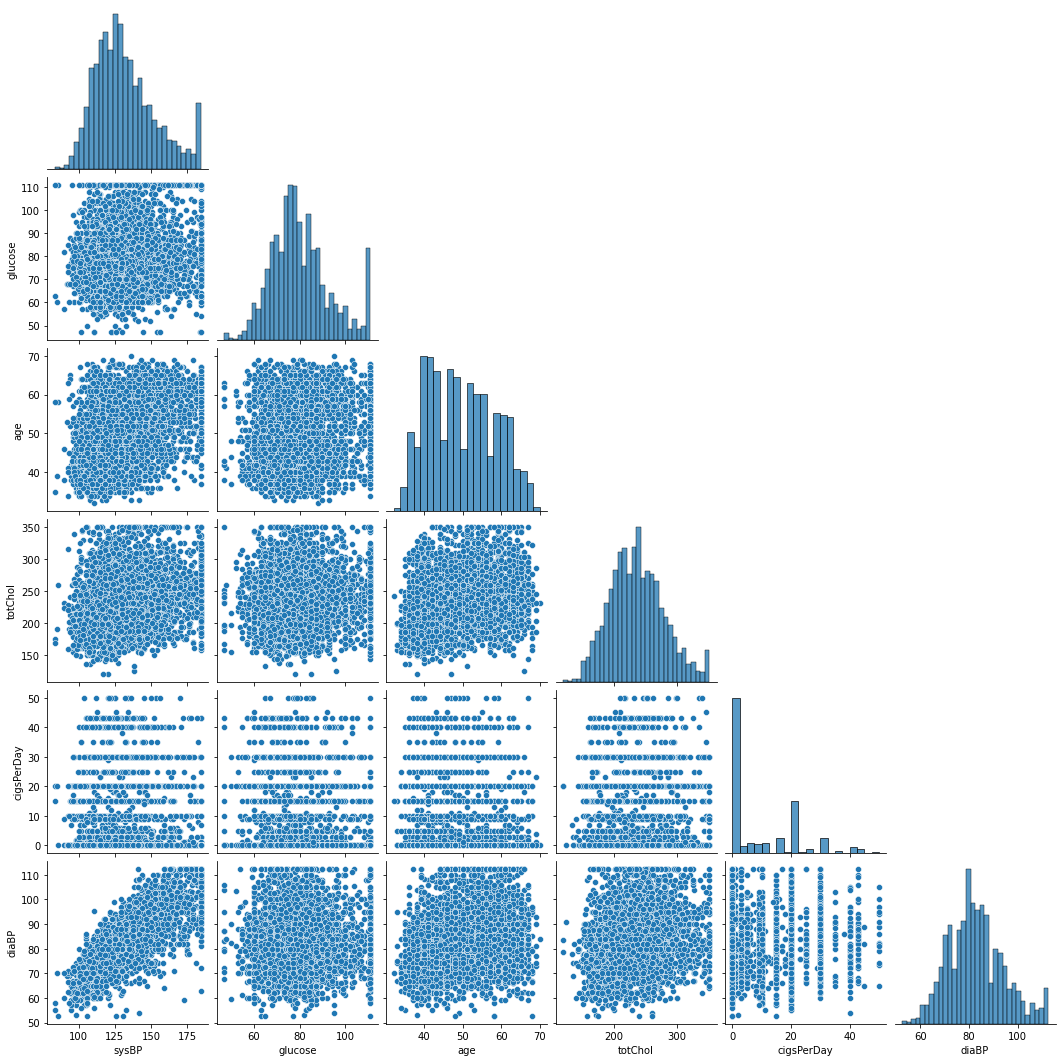

In [43]:
cont_col = ['sysBP','glucose','age','totChol','cigsPerDay','diaBP']
sns.pairplot(df[cont_col],corner=True)

In [44]:
df_clean = df
scaled_df = MinMaxScaler().fit_transform(df_clean)#all features do not follow normal dist so we go with minmaxscaler
scaled_df = pd.DataFrame(scaled_df,columns = df_clean.columns)
scaled_df

,sysBP,glucose,age,totChol,cigsPerDay,diaBP,prevalentHyp,diabetes,BPMeds,sex,TenYearCHD
0,0.222772,0.468750,0.184211,0.327586,0.00,0.291667,0.0,0.0,0.0,1.0,0.0
1,0.371287,0.453125,0.368421,0.564655,0.00,0.475000,0.0,0.0,0.0,0.0,0.0
2,0.435644,0.359375,0.421053,0.543103,0.40,0.458333,0.0,0.0,0.0,1.0,0.0
3,0.658416,0.875000,0.763158,0.456897,0.60,0.708333,1.0,0.0,0.0,0.0,1.0
4,0.460396,0.593750,0.368421,0.715517,0.46,0.525000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3744,0.569307,0.531250,0.684211,0.293103,0.00,0.475000,1.0,0.0,0.0,1.0,0.0
3745,0.836634,0.500000,0.947368,0.245690,0.00,0.741667,1.0,0.0,0.0,1.0,1.0
3746,0.945545,0.609375,0.473684,0.836207,0.02,0.658333,1.0,0.0,0.0,1.0,1.0
3747,0.425743,0.328125,0.500000,0.379310,0.86,0.458333,0.0,0.0,0.0,1.0,0.0


In [45]:

# clarify what is y and what is x label
y = scaled_df['TenYearCHD']
X = scaled_df.drop(['TenYearCHD'], axis = 1)

# divide train test: 80 % - 20 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [46]:
print(len(X_train))
print(len(X_test))

2999
750


Class 0: 3177
Class 1: 572
Proportion: 5.55 : 1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


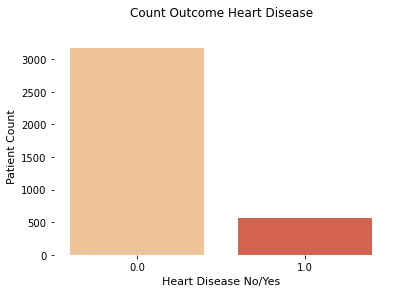

In [47]:
# Checking balance of outcome variable
target_count = scaled_df.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(scaled_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


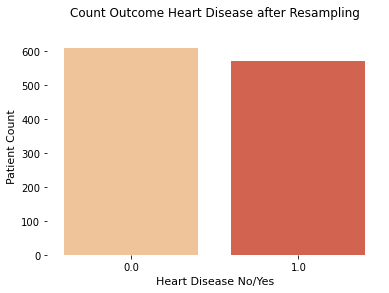

In [48]:
# Shuffle df
shuffled_df = scaled_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
plt.show()

In [49]:
normalized_df.TenYearCHD.value_counts()


0.0    611
1.0    572
Name: TenYearCHD, dtype: int64

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [54]:
y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)   
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

The accuracy score of LogisticRegression() is: 66.00%
The accuracy score of SVC() is: 64.40%
The accuracy score of DecisionTreeClassifier() is: 73.60%
The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 78.93%


In [55]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 66.0%
The f1 score for LogReg is: 34.1%
The precision score for LogReg is: 24.4%
The recall score for LogReg is: 56.39999999999999%


In [56]:
# Support Vector Machine
from sklearn.svm import SVC #importing libraries
#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

The accuracy score for SVM is: 64.4%
The f1 score for SVM is: 34.4%
The precision score for SVM is: 24.099999999999998%
The recall score for SVM is: 59.8%


Text(0.5, 1.1, 'Confusion matrix SVM\n')

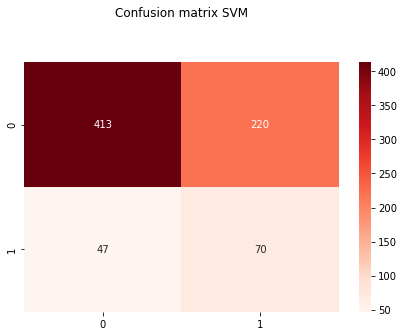

In [57]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1.1)

In [58]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

The accuracy score for DTC is: 73.6%
The f1 score for DTC is: 54.2%
The precision score for DTC is: 37.1%
The recall score for DTC is: 100.0%


Text(0.5, 1.1, 'Confusion matrix Decision Tree\n')

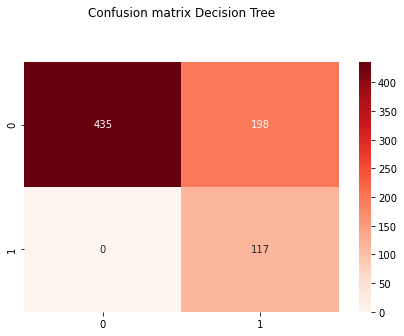

In [59]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Reds" , fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1.1)


In [60]:
# KNN Model

#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

The accuracy score for KNN is: 78.9%
The f1 score for KNN is: 41.0%
The precision score for KNN is: 36.4%
The recall score for KNN is: 47.0%


In [61]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")


The accuracy score of the test data is:  78.93333333333334 %
The accuracy score of the training data is:  76.25 %


In [62]:
# Perform cross validation
'''Cross Validation is used to assess the predictive performance of the models and and to judge 
how they perform outside the sample to a new data set'''

cv_results = cross_val_score(knn, X, y, cv=5) 

print ("Cross-validated scores:", cv_results)
print("The Accuracy of Model with Cross Validation is: {0:.2f}%".format(cv_results.mean() * 100))

Cross-validated scores: [0.824      0.832      0.844      0.83466667 0.82376502]
The Accuracy of Model with Cross Validation is: 83.17%


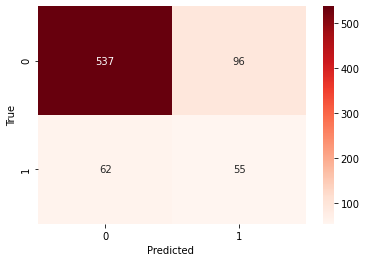

In [63]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

ax= plt.subplot()
sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Reds" , fmt='g')

ax.set_xlabel('Predicted ');ax.set_ylabel('True'); 


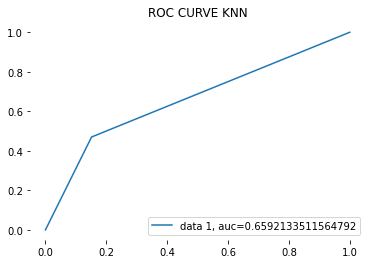

The score for the AUC ROC Curve is: 65.9%


In [65]:
# AU ROC CURVE KNN
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

'''the AUC ROC Curve is a measure of performance based on plotting the true positive and false positive rate 
and calculating the area under that curve.The closer the score to 1 the better the algorithm's ability to 
distinguish between the two outcome classes.'''

fpr, tpr, _ = roc_curve(y_test, normalized_df_knn_pred)
auc = roc_auc_score(y_test, normalized_df_knn_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.box(False)
plt.title ('ROC CURVE KNN')
plt.show()

print(f"The score for the AUC ROC Curve is: {round(auc,3)*100}%")